# Ejercicio clasificación

Clasificar números escritos a mano.

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

2024-06-03 09:44:54.183665: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


/Users/lunaflorestorres/.pyenv/versions/3.11.6/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 100%|██████████| 5/5 [00:24<00:00,  4.99s/ file]


Dataset mnist downloaded and prepared to /Users/lunaflorestorres/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/Users/lunaflorestorres/tensorflow_datasets/mnist/incomplete.PE55C5_3.0.1/',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      y

In [7]:
datos_entramiento = datos['train']
datos_pruebas = datos['test']

In [8]:
nombres_clases = metadatos.features['label'].names

In [9]:
nombres_clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
# Normalización para transformar los pixeles (0-255) de 0 a 1. Es decir, 0=0 y 255 = 1


# funcion para normalizar datos de ent y pruebas
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32) # convertir todas las imagenes que sean de tipo flotante
    imagenes = imagenes/255
    return imagenes, etiquetas

datos_entramiento = datos_entramiento.map(normalizar)
datos_pruebas= datos_pruebas.map(normalizar)

# agregar en cache
datos_entramiento = datos_entramiento.cache()
datos_pruebas = datos_pruebas.cache()


2024-06-03 09:59:32.537693: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-06-03 09:59:32.537901: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


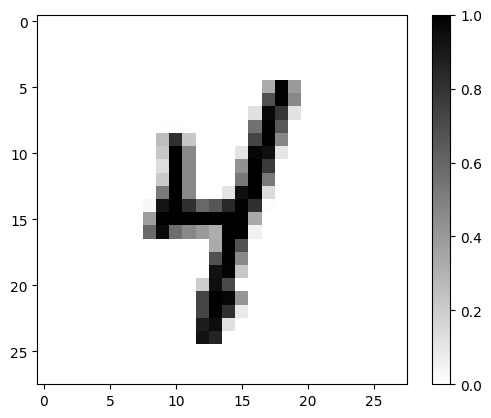

In [14]:
for imagen, etiqueta in datos_entramiento.take(1):
    break

import matplotlib.pyplot as plt

# Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary) #binary porque es blanco y negro
plt.colorbar()
plt.show()

2024-06-03 10:02:45.800622: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-06-03 10:02:45.800714: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-06-03 10:02:45.823024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence

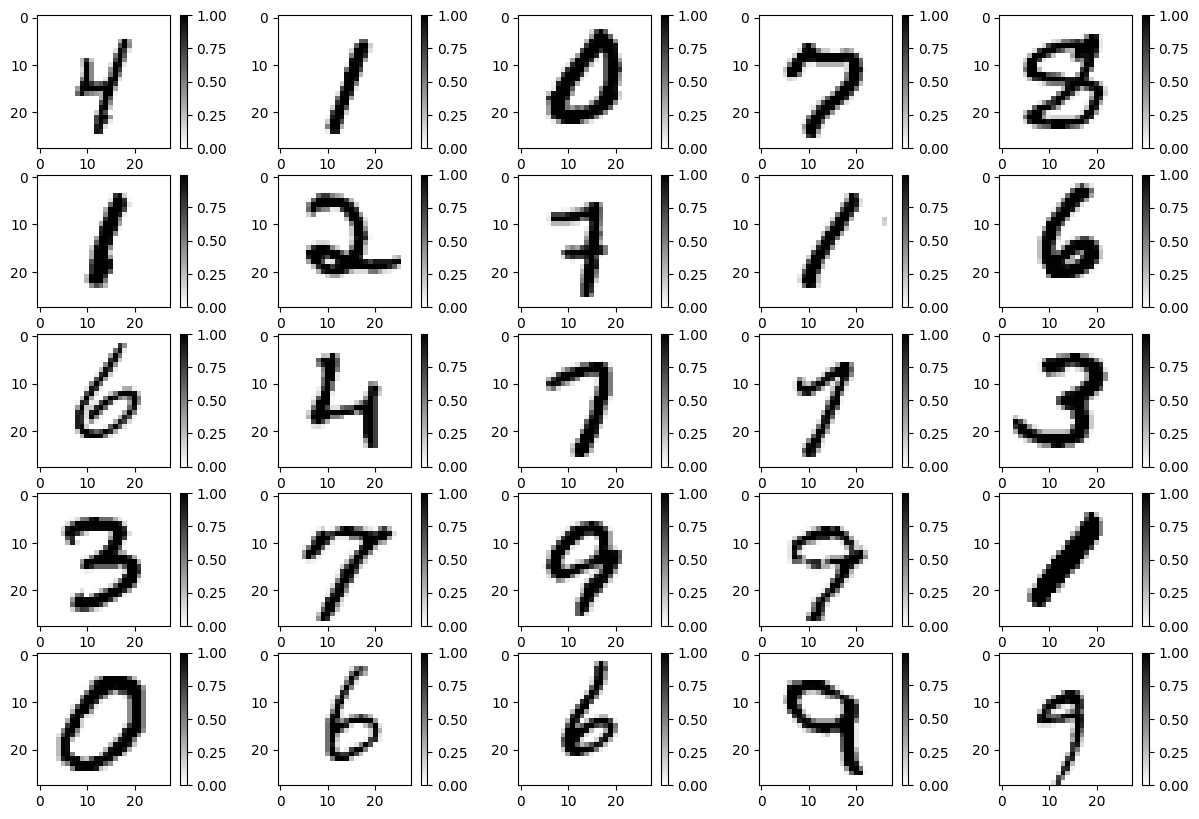

In [20]:
plt.figure (figsize=(15,10))
for i, (imagen, etiqueta) in enumerate(datos_entramiento.take(25)):

# Mostrarlo en pantalla
 plt.subplot(5,5,i+1)
 plt.imshow(imagen, cmap=plt.cm.binary) #binary porque es blanco y negro
 plt.colorbar()
plt.show()

In [30]:
modelo = tf.keras.Sequential([
    # 784 datos de entrada
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1= blanco y negro # 28 y 28 es el tamañano de cada número
    # Capas ocultas. En modelos grandes cuantas más mejor
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    # Capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/Users/lunaflorestorres/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']

)

In [25]:
tamaño_lote = 32  # que el modelo vaya en grupos de 32 en 32

datos_entramiento = datos_entramiento.repeat().shuffle(60000).batch(tamaño_lote) # El repeat() es que cuando llegue al final de los datos de entrenamiento, vuelva a empezar. 
# El suffle es para que reorganice los datos, por eso le paso el número de datos totales y el batch() es el tamaño de lote
datos_pruebas = datos_pruebas.batch(tamaño_lote)

In [32]:
import math

# Entrenar
entrenamiento = modelo.fit(
    datos_entramiento, epochs = 10,
    steps_per_epoch = math.ceil(60000/tamaño_lote)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8513 - loss: 0.5104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9537 - loss: 0.1573
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9674 - loss: 0.1074
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9745 - loss: 0.0839
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9769 - loss: 0.0753
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9824 - loss: 0.0590
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9825 - loss: 0.0540
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9871 - loss: 0.0432
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9873 - loss: 0.0404
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9892 - loss: 0.0355


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


2024-06-03 10:23:42.791407: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-06-03 10:23:42.791487: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-06-03 10:23:42.964026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence

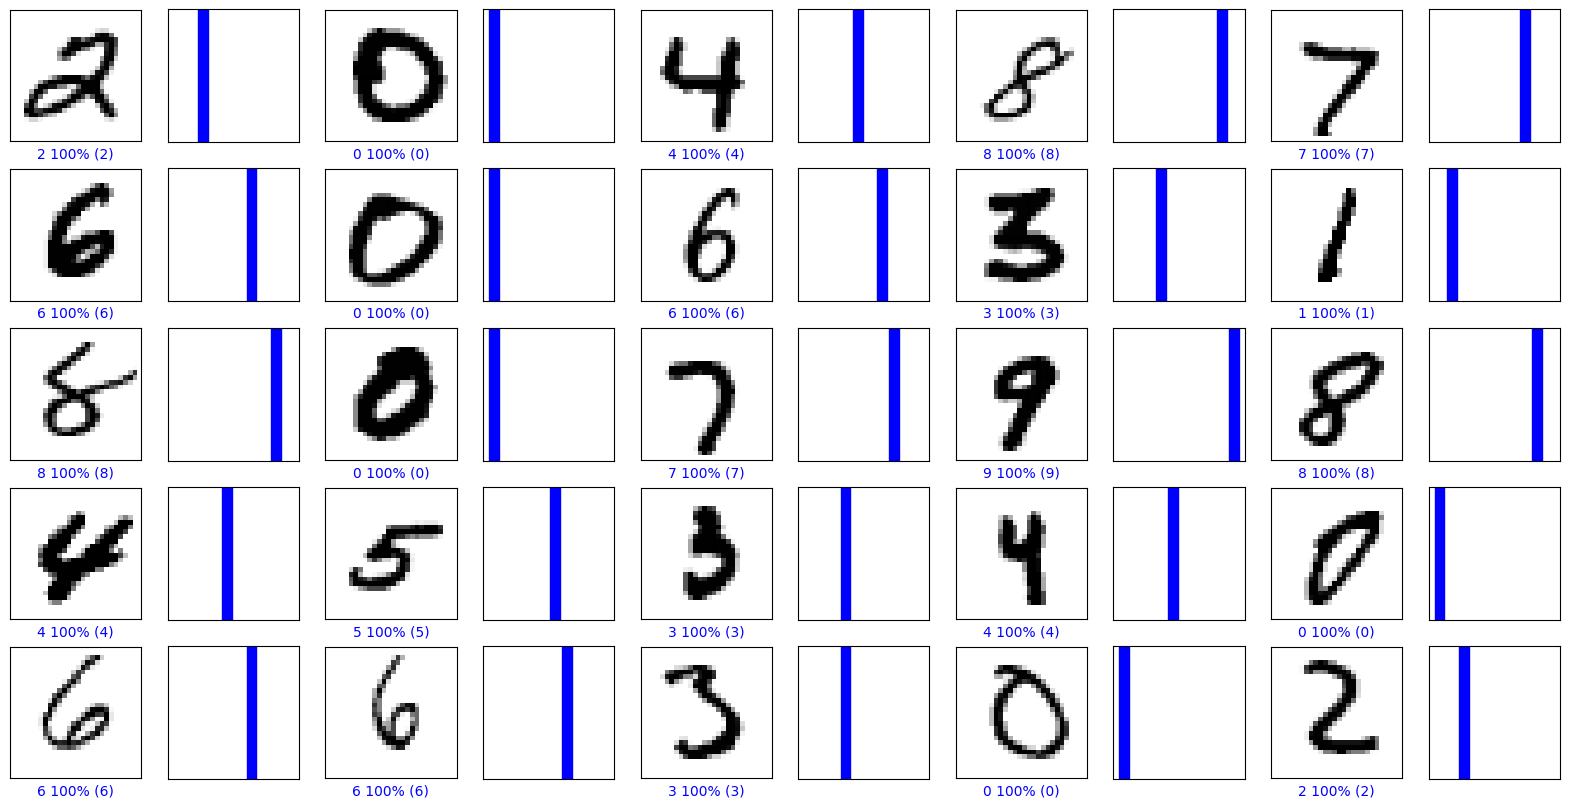

In [33]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

** La capa Dense es mejor para clasificaciones de caracteristicas tipo numero de habitaciones. para imágenes es mejor usar otras por las imagenes no es algo concreto.